# Determining matrix for servo mix from position and orientation of rotors
##### Julien Lecoeur  19/12/2016

The goal is to determine the servo-mix matrix $B$, used to compute motor commands from 3D thrust and 3D torque commands:
$$
\vec{u} = B \cdot \begin{bmatrix} \vec{m} \\ \vec{t} \end{bmatrix}
$$

Where 
- $\vec{t}$ is the $(3 \times 1)$ thrust command vector
- $\vec{m}$ is the $(3 \times 1)$ torque command vector
- $\vec{u}$ is the $(n \times 1)$ motor command vector


> Reference for simpler case (motors on 2D plane, all pointing vertically) from paparazzi : https://wiki.paparazziuav.org/wiki/RotorcraftMixing

## Thrust generated by rotor
$$\vec{t}_i = k_t . \rho . D^4 . \omega_i^2 .\vec{v}_i \\
  \vec{t}_i \approx C_t . u_i . \vec{v}_i$$
    
Where
- $\vec{t}_i$ is the thrust
- $\vec{v}_i$ is the main axis of the rotor (unit vector)
- $k_t$ is the thrust coeffient of the propeller
- $C_t$ is the approximated thrust coeffient of the motor/propeller unit
- $\omega_i$ is the rotation speed
- $\rho$ is the fluid density
- $D$ is the diameter of the propeller
- $u_i$ is the motor command

## Thrust generated by a set of motors

Can be computed using a matrix $A_t$ defined as:
$$
\vec{t} = A_t \cdot \vec{u}
$$
Where 
- $\vec{t}$ is the $(3 \times 1)$ thrust vector
$$
\vec{t} = \begin{bmatrix} t_x \\ t_y \\ t_z \end{bmatrix}
$$
- $A_t$ is a $(3 \times n)$ matrix with the thrust generated by the i-th rotor on the i-th column:
$$
A_t = \begin{bmatrix}
                  &       &           &       &               \\
        \vec{t}_0 & \dots & \vec{t}_i & \dots & \vec{t}_{n-1} \\
                  &       &           &       &               \\
     \end{bmatrix}
$$
- $\vec{u}$ is the $(n \times 1)$ command vector
$$
\vec{u} = \begin{bmatrix} u_0  \\ \vdots \\ u_i \\ \vdots \\ u_{n-1} \end{bmatrix}
$$

## Torque generated by rotor
$$
\vec{m}_i = (\vec{p}_i - \vec{p}_{cg}) \times (k_t . \rho . D^4 . \omega_i^2 .\vec{v}_i)  - d_i . k_m . \rho . D^5  . \omega^2_i . \vec{v}_i \\
$$
$$
\vec{m}_i \approx \left( C_t . (\vec{p}_i - \vec{p}_{cg}) \times \vec{v}_i \right) . u_i  
           - \left( d_i . C_m . D . \vec{v}_i \right) . u_i
$$
$$
\vec{m}_i \approx \left( C_t . (\vec{p}_i - \vec{p}_{cg}) \times \vec{v}_i \right) . u_i  
           - \left( d_i . \frac{C_t}{10} . D . \vec{v}_i \right) . u_i
$$

Where
- $\vec{m}_i$ it the torque
- $\vec{v}_i$ is the main axis of the rotor
- $\vec{p}_i$ is the position of the center of the rotor
- $\vec{p}_{cg}$ is the position of the center of mass
- $k_t$ is the thrust coeffient of the propeller
- $k_m$ is the moment coeffient of the propeller (usually $k_m \approx \frac{k_t}{10}$)
- $C_t$ is the approximated thrust coeffient of the motor/propeller unit
- $C_m$ is the approximated moment coeffient of the motor/propeller unit ($C_m \approx D.\frac{C_t}{10}$)
- $\rho$ is the fluid density
- $D$ is the diameter of the propeller
- $d_i$ is the rotation direction (-1 for CW or +1 for CCW)
- $\omega_i$ is the rotation speed
- $u_i$ is the motor command

## Torque generated by a set of motors

Can be computed using a matrix $A_m$ defined as:
$$
\vec{m} = A_m \cdot \vec{u}
$$
Where 
- $\vec{m}$ is the $(3 \times 1)$ torque vector
$$
\vec{m} = \begin{bmatrix} m_x \\ m_y \\ m_z \end{bmatrix}
$$
- $A_m$ is a $(3 \times n)$ matrix with the torque generated by the i-th rotor on the i-th column:
$$
A_m = \begin{bmatrix}
                  &       &           &       &               \\
        \vec{m}_0 & \dots & \vec{m}_i & \dots & \vec{m}_{n-1} \\
                  &       &           &       &               \\
     \end{bmatrix}
$$
- $\vec{u}$ is the $(n \times 1)$ command vector
$$
\vec{u} = \begin{bmatrix} u_0  \\ \vdots \\ u_i \\ \vdots \\ u_{n-1} \end{bmatrix}
$$

## Combined torque and thrust matrix

We define the $(6 \times n)$ matrix $A$ as 
$$
A = \begin{bmatrix} A_m \\ At \end{bmatrix}
$$

The matrix $A$ allows to compute the thrust and torque generated by a set of $n$ motors as a function of the throttle command of each motor:
$$
\begin{bmatrix} \vec{m} \\ \vec{t} \end{bmatrix} = A \cdot \vec{u}
$$
or
$$
\begin{bmatrix} m_x \\ m_y \\ m_z \\ t_x \\ t_y \\ t_z \end{bmatrix} =  
\begin{bmatrix} 
    m^0_x && \dots && m^i_x && \dots && m^{n-1}_x  \\
    m^0_y && \dots && m^i_y && \dots && m^{n-1}_y  \\
    m^0_z && \dots && m^i_z && \dots && m^{n-1}_z  \\
    t^0_x && \dots && t^i_x && \dots && t^{n-1}_x  \\
    t^0_y && \dots && t^i_y && \dots && t^{n-1}_y  \\
    t^0_z && \dots && t^i_z && \dots && t^{n-1}_z  \\
\end{bmatrix} 
\cdot \begin{bmatrix} u_0  \\ \vdots \\ u_i \\ \vdots \\ u_{n-1} \end{bmatrix}
$$

## Servo mixing matrix

In order to compute the command to apply to each motor for a desired thrust and torque, we need the $(n \times 6)$ servo-mix matrix $B$:

$$
\vec{u} = B \cdot \begin{bmatrix} \vec{m} \\ \vec{t} \end{bmatrix}
$$

The matrix $B$ can be computed as the Moore-Penrose pseudo-inverse of matrix $A$. The singular value decomposition (SVD) of $A$ gives $A = U \cdot \sigma \cdot V^T$, where $\sigma$ is a diagonal matrix. If $A$ has a rank $r$, then the first $r$ elements of $\sigma$ are non-nul. $B$ can be computed as
$B = V \cdot \sigma^{+} \cdot U^T $. Where $\sigma^{+}$ is a diagonal matrix that contains the inverse of the non-nul terms of the diagonal of $\sigma$.



## Taking Mass and Inertia into account

The formulas above allow to adapt the terms of the servo mixing matrix $B$ to the geometrical and aerodynamic characterisitcs of the drones. Thus it is possible to apply the correct motor commands for desired thrust and torque commands. 

However, in order to fully abstract the dynamics of the system, we may want to give angular and linear acceleration commands instead of torque and thrust commands. Torque and thrust are given by:
$$
\vec{m} = J \cdot \vec{\alpha} \\
\vec{t} = M \cdot \vec{a}
$$

Where
- $\vec{m}$ is the torque vector
- $\vec{t}$ is the thrust vector
- $J$ is the inertia matrix
- $M$ is the mass of the system
- $\vec{\alpha}$ is the angular acceleration vector
- $\vec{a}$ is the acceleration vector

Thus the motors commands can be computed from angular and acceleration commands as:
$$
\vec{u} = B \cdot H \cdot \begin{bmatrix} \vec{\alpha} \\ \vec{a} \end{bmatrix}
$$

Where $H$ is a concatenation of matrix of inertia $J$ and the mass of the system $M$ multiplied by the identity matrix $I_3$:
$$
H = \begin{bmatrix} J & 0_3 \\ 0_3 & M \cdot I_3 \end{bmatrix}
$$

## Practical usage
For robots where the geometry, motors and propellers are known, $B$ can be pre-computed offline (see the examples bellow using the numpy implementation of the pseudo-inverse `numpy.linalg.pinv`).

Also, if the robot has planar symmetries relative to the planes $XY$, $XZ$ and $YZ$, then the matrix of inertia is diagonal and motor commands are computed as
$$
\vec{u} = B \cdot 
\begin{bmatrix}
    J_{xx}      & 0           & 0            & 0           & 0           & 0            \\
    0           & J_{yy}      & 0            & 0           & 0           & 0            \\
    0           & 0           & J_{zz}       & 0           & 0           & 0            \\
    0           & 0           & 0            & M           & 0           & 0            \\
    0           & 0           & 0            & 0           & M           & 0            \\
    0           & 0           & 0            & 0           & 0           & M            \\
\end{bmatrix}
\cdot 
\begin{bmatrix} \vec{\alpha} \\ \vec{a} \end{bmatrix}
$$


---
# Implementation
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

### Torque matrix $A_m$ from geometry

In [2]:
def compute_torque(center, axis, dirs, Ct, Cm):
    #normalize rotor axis
    ax     = axis / np.linalg.norm(axis, axis=1)[:,np.newaxis]
    torque = Ct * np.cross(center, ax) - Cm * ax * dirs
    return torque

def compute_torque_matrices(geom):
    # Torque matrix, each column is the torque generated by one rotor
    Am = compute_torque(center=geom[['x', 'y', 'z']].values, 
                        axis=geom[['ax', 'ay', 'az']].values, 
                        dirs=geom[['dir']].values,
                        Ct=geom[['ct']].values, 
                        Cm=geom[['cm']].values).T
    
    # Torque servo mix computed as pseudoinverse of At
    # Each column is the command to apply to the servos to get torques on roll, pitch and yaw torques
    Bm = np.linalg.pinv(Am)

    return Am, Bm


### Thrust matrix $A_t$ from geometry

In [3]:
def compute_thrust(axis, Ct):
    # Normalize rotor axis
    ax     = axis / np.linalg.norm(axis, axis=1)[:,np.newaxis]
    thrust = Ct * ax
    return thrust

def compute_thrust_matrices(geom):
    # Thrust matrix, each column is the thrust generated by one rotor
    At = compute_thrust(axis=geom[['ax', 'ay', 'az']].values,
                        Ct=geom[['ct']].values).T
    
    # Thrust servo mix computed as pseudoinverse of At
    # Each column is the command to apply to the servos to get thrust on x, y, and z
    Bt = np.linalg.pinv(At)

    return At, Bt

### Combined torque/thrust matrices $A$ and $B$

In [4]:
def compute_torque_thrust_matrices(geom):
    # Torque matrices
    Am, Bm = compute_torque_matrices(geom)

    # Thrust matrices
    At, Bt = compute_thrust_matrices(geom)

    # Combined matrices
    A = np.vstack([Am, At])
    B = np.linalg.pinv(A)
    
    A = pd.DataFrame(A, index=  ['Roll', 'Pitch', 'Yaw', 'X', 'Y', 'Z'])
    B = pd.DataFrame(B, columns=['Roll', 'Pitch', 'Yaw', 'X', 'Y', 'Z'])
    
    return A, B 

def print_matrices(A, B):
    print('\nA|' + ''.join(['|  ' + str(i) + '  ' for i in range(geom.shape[0])]) + '|\n', 
      A.round(2))
    print('\nB|   R  |  P  |  Y  |  X  |  Y  |  Z  |\n', 
          B.round(2))
    
    print('\nActuation effort for unit commands')
    print('Torque: norm ', np.linalg.norm(B[:, :3], axis=0).round(2), '/ std ', np.abs(B[:, :3]).std(axis=0).round(2))
    print('Thrust: norm ', np.linalg.norm(B[:, 3:], axis=0).round(2), '/ std ', np.abs(B[:, 3:]).std(axis=0).round(2))
    
def print_actuation_effort(Bdf):
    B = Bdf.values
    print('\nActuation effort for unit commands')
    print('Torque: norm ', np.linalg.norm(B[:, :3], axis=0).round(2), '/ std ', np.abs(B[:, :3]).std(axis=0).round(2))
    print('Thrust: norm ', np.linalg.norm(B[:, 3:], axis=0).round(2), '/ std ', np.abs(B[:, 3:]).std(axis=0).round(2))
   

In [5]:
# Plotting
def plot(geom):
    plt.figure(figsize=[6,6])
    l = 0.05
    for i, g in geom.iterrows():
        color = plt.cm.rainbow(i / geom.shape[0])
        style='-'
        if g.dir == 1:
            marker='o'
        else:
            marker='s'
            
        # top view
        plt.subplot(221)
        plt.plot([0.0, 0.1],          [0.0,  0.0],          '--k', alpha=0.3)
        plt.plot([0.0, 0.0],          [0.0, -0.1],          '--k', alpha=0.1)
        plt.plot([0.0, g.x],          [0.0, -g.y],          '-k', alpha=0.5)
        plt.plot([g.x, g.x + l*g.ax], [-g.y,-(g.y + l*g.ay)], 
                 linestyle=style, marker=marker, color=color, markevery=2, linewidth=4)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.xlim([-0.2, 0.2])
        plt.ylim([-0.2, 0.2])
        plt.xticks([])
        plt.yticks([])
        
        # side view
        plt.subplot(222)
        plt.plot([0.0,  0.1],          [0.0,  0.0],             '--k', alpha=0.3)
        plt.plot([0.0,  0.0],          [0.0,  -0.1],             '--k', alpha=0.1)
        plt.plot([0.0,  -g.y],          [0.0, -g.z],             '-k', alpha=0.5)
        plt.plot([-g.y,-(g.y + l*g.ay)], [-g.z,-(g.z + l*g.az)], 
                 linestyle=style, marker=marker, color=color, markevery=2, linewidth=4)
        plt.xlabel('y')
        plt.ylabel('z')
        plt.xlim([-0.2, 0.2])
        plt.ylim([-0.2, 0.2])
        plt.xticks([])
        plt.yticks([])
        
        # front view
        plt.subplot(223)
        plt.plot([0.0, 0.1],          [0.0,  0.0],             '--k', alpha=0.3)
        plt.plot([0.0, 0.0],          [0.0, -0.1],             '--k', alpha=0.1)
        plt.plot([0.0, g.x],          [0.0, -g.z],             '-k', alpha=0.5)
        plt.plot([g.x, g.x + l*g.ax], [-g.z, -(g.z + l*g.az)], 
                 linestyle=style, marker=marker, color=color, markevery=2, linewidth=4)
        plt.xlabel('x')
        plt.ylabel('z')
        plt.xlim([-0.2, 0.2])
        plt.ylim([-0.2, 0.2])
        plt.xticks([])
        plt.yticks([])
        
        # perspective view
        view = np.array([-1.0, -0.3, 0.5])
        ax_x = np.cross(np.array([0, 0, 1]), view)
        ax_x = ax_x / np.linalg.norm(ax_x)
        ax_y = np.cross(view, ax_x)
        ax_y = ax_y / np.linalg.norm(ax_y)
        pos  = [np.dot(np.array([g.x, -g.y, -g.z]), ax_x),
                np.dot(np.array([g.x, -g.y, -g.z]), ax_y)]
        axis = [np.dot(np.array([g.ax, -g.ay, -g.az]), ax_x),
                np.dot(np.array([g.ax, -g.ay, -g.az]), ax_y)]      
        plt.subplot(224)
        plt.plot([0.0, np.dot([0.1, 0, 0], ax_x)], [0.0, np.dot([0.1, 0, 0], ax_y)], '--k', alpha=0.3)
        plt.plot([0.0, np.dot([0, -0.1, 0], ax_x)], [0.0, np.dot([0, -0.1, 0], ax_y)], '--k', alpha=0.1)
        plt.plot([0.0, np.dot([0, 0, -0.1], ax_x)], [0.0, np.dot([0, 0, -0.1], ax_y)], '--k', alpha=0.1)
        plt.plot([0.0, pos[0]],          [0.0, pos[1]],             '-k', alpha=0.5)
        plt.plot([pos[0], pos[0] + l*axis[0]], [pos[1], pos[1] + l*axis[1]], 
                 linestyle=style, marker=marker, color=color, markevery=2, linewidth=4)
        plt.xlabel('')
        plt.ylabel('')
        plt.xlim([-0.2, 0.2])
        plt.ylim([-0.2, 0.2])
        plt.xticks([])
        plt.yticks([])
        
    plt.tight_layout()

---
# Examples
---

## Example for quadrotor


Actuation effort for unit commands
Torque: norm  [  4.35   4.35  33.33] / std  [ 0.  0.  0.]
Thrust: norm  [ 0.   0.   0.5] / std  [ 0.  0.  0.]
A
          0     1     2     3
Roll   0.12  0.12 -0.12 -0.12
Pitch -0.12  0.12  0.12 -0.12
Yaw    0.02 -0.02  0.02 -0.02
X      0.00  0.00  0.00  0.00
Y      0.00  0.00  0.00  0.00
Z     -1.00 -1.00 -1.00 -1.00

Mix:


,Roll,Pitch,Yaw,X,Y,Z
0,2.17,-2.17,16.67,0.0,0.0,-0.25
1,2.17,2.17,-16.67,0.0,0.0,-0.25
2,-2.17,2.17,16.67,0.0,0.0,-0.25
3,-2.17,-2.17,-16.67,0.0,0.0,-0.25


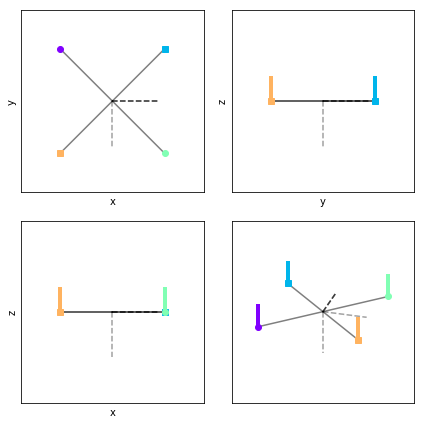

In [6]:
# Geometry
width  = 0.23
length = 0.23
geom = pd.DataFrame({ 'x':[-0.5*width,   0.5*width,  0.5*width, -0.5*width ],
                      'y':[-0.5*length, -0.5*length, 0.5*length, 0.5*length],
                      'z':[0.0,          0.0,        0.0,        0.0       ],
                      'ax':[0.0,         0.0,        0.0,        0.0       ],
                      'ay':[0.0,         0.0,        0.0,        0.0       ],
                      'az':[-1.0,       -1.0,       -1.0,       -1.0       ],
                      'dir':[1.0,       -1.0,        1.0,       -1.0       ],
                      'ct':[1.0,         1.0,        1.0,        1.0       ],
                      'cm':[0.015,       0.015,      0.015,      0.015     ]}, # prop diameter=0.15 -> cm = 0.1*0.15*ct
                    columns = ['x', 'y', 'z', 'ax', 'ay', 'az', 'dir', 'ct', 'cm'])

# Matrices
A, B = compute_torque_thrust_matrices(geom)

plot(geom)
print_actuation_effort(B)

print("A")
print(A.round(2))

print('\nMix:')
B.round(2)

# Example for quadrotor with tilted motors


Actuation effort for unit commands
Torque: norm  [ 0.65  0.48  7.02] / std  [ 0.21  0.    0.13]
Thrust: norm  [ 1.59  1.59  0.55] / std  [ 0.01  0.04  0.01]

Normalized Mix (as in paparazzi):
    Roll  Pitch    Yaw      X      Y      Z
0 -255.0  253.0 -255.0  251.0 -233.0 -255.0
1  255.0  253.0  255.0  251.0  233.0 -255.0
2   22.0 -255.0 -237.0 -255.0  255.0 -237.0
3  -22.0 -255.0  237.0 -255.0 -255.0 -237.0

Normalized Mix (as in PX4):
   Roll  Pitch   Yaw     X     Y     Z
0 -1.00   0.52 -1.00  0.95 -0.91 -0.34
1  1.00   0.52  1.00  0.95  0.91 -0.34
2  0.09  -0.53 -0.93 -0.97  1.00 -0.32
3 -0.09  -0.53  0.93 -0.97 -1.00 -0.32

Mix:


,Roll,Pitch,Yaw,X,Y,Z
0,-0.46,0.24,-3.64,0.79,-0.76,-0.28
1,0.46,0.24,3.64,0.79,0.76,-0.28
2,0.04,-0.24,-3.38,-0.80,0.83,-0.26
3,-0.04,-0.24,3.38,-0.80,-0.83,-0.26


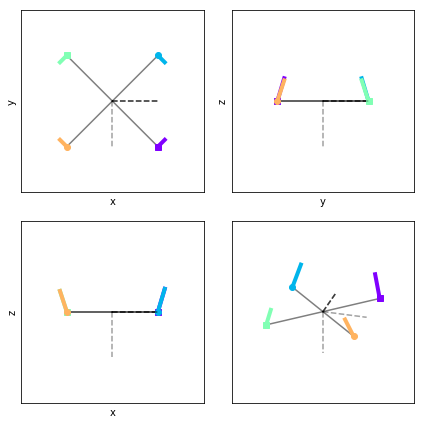

In [7]:
# Geometry
s45 = np.sin(np.deg2rad(45))
c45 = np.cos(np.deg2rad(45))
s25 = np.sin(np.deg2rad(25))
c25 = np.cos(np.deg2rad(25))
geom = pd.DataFrame({ 'x':np.array([ 0.1,  0.1, -0.1, -0.1]),
                      'y':np.array([ 0.1, -0.1, -0.1, 0.1]),
                      'z':[0.0               for _ in range(4) ],
                      'ax':np.array([ 1, 1,-1,-1]) * s25 * c45,
                      'ay':np.array([-1, 1, 1,-1]) * s25 * c45,
                      'az':[-1.0, -1.0, -c25, -c25 ],
                      'dir':[(-1.0)**(i+1)   for i in range(4) ],
                      'ct':[1.0              for _ in range(4) ],
                      'cm':[0.015            for _ in range(4) ] # prop diameter=0.15 -> cm = 0.1*0.15*ct
                    },
                    columns = ['x', 'y', 'z', 'ax', 'ay', 'az', 'dir', 'ct', 'cm'])

# Matrices
A, B = compute_torque_thrust_matrices(geom)

plot(geom)
print_actuation_effort(B)

print('\nNormalized Mix (as in paparazzi):')
from scipy.stats import threshold
B_norm = B.abs().max(axis=0)
B_norm[np.abs(B_norm)<1e-3] = 1
B_papa = (255 * B / B_norm).round()
print(B_papa)

print('\nNormalized Mix (as in PX4):')
from scipy.stats import threshold
B_norm = B.abs().max(axis=0)

# Same scale on roll and pitch
B_norm.Roll = max(B_norm.Roll, B_norm.Pitch)
B_norm.Pitch = B_norm.Roll

# Same scale on x, y and z thrust
B_norm.X = max(B_norm.X, B_norm.Y, B_norm.Z)
B_norm.Y = B_norm.X
B_norm.Z = B_norm.X

B_norm[np.abs(B_norm)<1e-3] = 1
B_px4 = (1.0 * B / B_norm).round(2)
print(B_px4)

print('\nMix:')
B.round(2)

# Example for hexacopter


Actuation effort for unit commands
Torque: norm  [  3.61   3.61  27.22] / std  [ 0.49  0.85  0.  ]
Thrust: norm  [ 0.    0.    0.41] / std  [ 0.  0.  0.]
A
          0     1     2     3     4     5
Roll  -0.08 -0.16 -0.08  0.08  0.16  0.08
Pitch  0.14  0.00 -0.14 -0.14 -0.00  0.14
Yaw   -0.02  0.02 -0.02  0.02 -0.02  0.02
X      0.00  0.00  0.00  0.00  0.00  0.00
Y      0.00  0.00  0.00  0.00  0.00  0.00
Z     -1.00 -1.00 -1.00 -1.00 -1.00 -1.00

Mix:


,Roll,Pitch,Yaw,X,Y,Z
0,-1.04,1.8,-11.11,0.0,0.0,-0.17
1,-2.08,-0.0,11.11,0.0,0.0,-0.17
2,-1.04,-1.8,-11.11,0.0,0.0,-0.17
3,1.04,-1.8,11.11,0.0,0.0,-0.17
4,2.08,0.0,-11.11,0.0,0.0,-0.17
5,1.04,1.8,11.11,0.0,0.0,-0.17


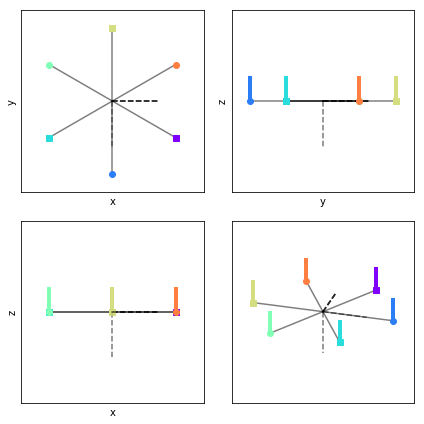

In [8]:
# Geometry
l  = 0.16
thetas = np.arange(0, 2*np.pi, np.pi/3) + np.pi/6.0
geom = pd.DataFrame({ 'x':[l * np.cos(theta) for theta in thetas ],
                      'y':[l * np.sin(theta) for theta in thetas ],
                      'z':[0.0               for _     in thetas ],
                      'ax':[0.0              for _     in thetas ],
                      'ay':[0.0              for _     in thetas ],
                      'az':[-1.0             for _     in thetas ],
                      'dir':[-1+2*(i%2)      for i,_   in enumerate(thetas)],
                      'ct':[1.0              for _     in thetas ],
                      'cm':[0.015            for _     in thetas ], # prop diameter=0.15 -> cm = 0.1*0.15*ct
                    },
                    columns = ['x', 'y', 'z', 'ax', 'ay', 'az', 'dir', 'ct', 'cm'])

# Matrices
A, B = compute_torque_thrust_matrices(geom)

plot(geom)
print_actuation_effort(B)

print("A")
print(A.round(2))

print('\nMix:')
B.round(2)

## Example for hexacopter in V shape (same example as paparazzi)


Actuation effort for unit commands
Torque: norm  [  4.17   3.57  28.75] / std  [ 0.71  0.84  3.79]
Thrust: norm  [ 0.    0.    0.41] / std  [ 0.  0.  0.]

Normalized Mix (as in paparazzi):
    Roll  Pitch    Yaw    X    Y      Z
0  -67.0 -256.0 -154.0  0.0  0.0 -256.0
1   67.0 -256.0  154.0  0.0  0.0 -256.0
2 -256.0   -0.0  256.0  0.0  0.0 -256.0
3  256.0    0.0 -256.0  0.0  0.0 -256.0
4 -189.0  256.0 -115.0  0.0  0.0 -256.0
5  189.0  256.0  115.0  0.0  0.0 -256.0

Mix:


,Roll,Pitch,Yaw,X,Y,Z
0,-0.60,-1.79,-9.77,0.0,0.0,-0.17
1,0.60,-1.79,9.77,0.0,0.0,-0.17
2,-2.32,-0.00,16.27,0.0,0.0,-0.17
3,2.32,0.00,-16.27,0.0,0.0,-0.17
4,-1.72,1.79,-7.29,0.0,0.0,-0.17
5,1.72,1.79,7.29,0.0,0.0,-0.17


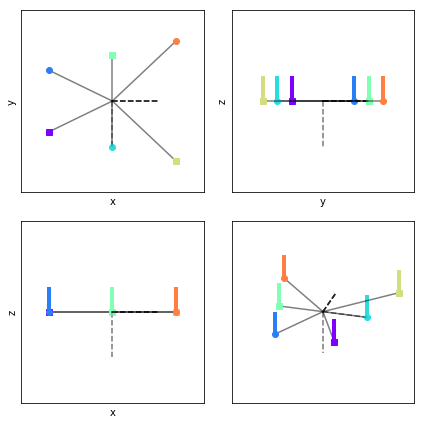

In [9]:
# Geometry
geom = pd.DataFrame({ 'x':np.array([-0.35, -0.35,  0.0,   0.0,  0.35,  0.35])*0.4,
                      'y':np.array([ 0.17, -0.17,  0.25, -0.25, 0.33, -0.33])*0.4,
                      'z':[0.0               for _ in range(6) ],
                      'ax':[0.0              for _ in range(6) ],
                      'ay':[0.0              for _ in range(6) ],
                      'az':[-1.0             for _ in range(6) ],
                      'dir':[-1+2*(((i+1)//2)%2)      for i in range(6)],
                      'ct':[1.0              for _ in range(6) ],
                      'cm':[0.015            for _ in range(6) ]  # prop diameter=0.15 -> cm = 0.1*0.15*ct
                    },
                    columns = ['x', 'y', 'z', 'ax', 'ay', 'az', 'dir', 'ct', 'cm'])

# Matrices
A, B = compute_torque_thrust_matrices(geom)

plot(geom)
print_actuation_effort(B)

print('\nNormalized Mix (as in paparazzi):')
from scipy.stats import threshold
B_norm = B.abs().max(axis=0)
B_norm[np.abs(B_norm)<1e-3] = 1
B_papa = (256 * B / B_norm).round()
print(B_papa)

print('\nMix:')
B.round(2)

## Example for hexacopter in H shape


Actuation effort for unit commands
Torque: norm  [  6.56  10.    28.87] / std  [ 0.89  2.36  3.93]
Thrust: norm  [ 0.    0.    0.41] / std  [ 0.  0.  0.]

Normalized Mix (as in paparazzi):
    Roll  Pitch    Yaw    X    Y      Z
0 -255.0   -0.0  255.0  0.0  0.0 -255.0
1  255.0    0.0 -255.0  0.0  0.0 -255.0
2  127.0  255.0  127.0  0.0  0.0 -255.0
3 -128.0 -255.0 -127.0  0.0  0.0 -255.0
4 -127.0  255.0 -127.0  0.0  0.0 -255.0
5  128.0 -255.0  127.0  0.0  0.0 -255.0

Normalized Mix (as in PX4):
   Roll  Pitch  Yaw    X    Y    Z
0 -0.76   -0.0  1.0  0.0  0.0 -1.0
1  0.76    0.0 -1.0  0.0  0.0 -1.0
2  0.38    1.0  0.5  0.0  0.0 -1.0
3 -0.38   -1.0 -0.5  0.0  0.0 -1.0
4 -0.38    1.0 -0.5  0.0  0.0 -1.0
5  0.38   -1.0  0.5  0.0  0.0 -1.0

Mix:


,Roll,Pitch,Yaw,X,Y,Z
0,-3.79,-0.0,16.67,0.0,0.0,-0.17
1,3.79,0.0,-16.67,0.0,0.0,-0.17
2,1.89,5.0,8.33,0.0,0.0,-0.17
3,-1.89,-5.0,-8.33,0.0,0.0,-0.17
4,-1.89,5.0,-8.33,0.0,0.0,-0.17
5,1.89,-5.0,8.33,0.0,0.0,-0.17


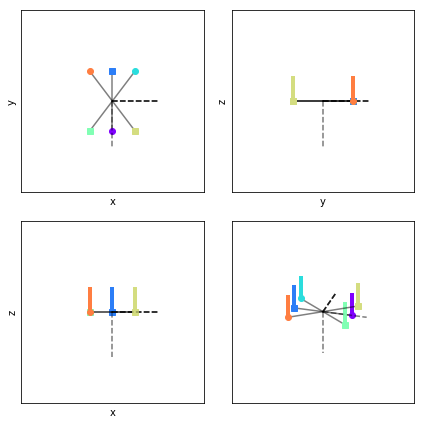

In [10]:
# Geometry
geom = pd.DataFrame({ 'x':np.array([ 0.000, -0.000,   0.050, -0.050, 0.050, -0.050]),
                      'y':np.array([ 0.066, -0.066,  -0.066,  0.066, 0.066, -0.066]),
                      'z':[0.0               for _ in range(6) ],
                      'ax':[0.0              for _ in range(6) ],
                      'ay':[0.0              for _ in range(6) ],
                      'az':[-1.0             for _ in range(6) ],
                      'dir':np.array([1, -1, 1, -1, -1, 1]),
                      'ct':[1.0              for _ in range(6) ],
                      'cm':[0.015            for _ in range(6) ] # prop diameter=0.15 -> cm = 0.1*0.15*ct
                    },
                    columns = ['x', 'y', 'z', 'ax', 'ay', 'az', 'dir', 'ct', 'cm'])

# Matrices
A, B = compute_torque_thrust_matrices(geom)

plot(geom)
print_actuation_effort(B)

print('\nNormalized Mix (as in paparazzi):')
from scipy.stats import threshold
B_norm = B.abs().max(axis=0)
B_norm[np.abs(B_norm)<1e-3] = 1
B_papa = (255 * B / B_norm).round()
# B_papa = (1.0 * B / B_norm).round(2)
print(B_papa)

print('\nNormalized Mix (as in PX4):')
from scipy.stats import threshold
B_norm = B.abs().max(axis=0)

# Same scale on roll and pitch
B_norm.Roll = max(B_norm.Roll, B_norm.Pitch)
B_norm.Pitch = B_norm.Roll

# Same scale on x, y and z thrust
B_norm.X = max(B_norm.X, B_norm.Y, B_norm.Z)
B_norm.Y = B_norm.X
B_norm.Z = B_norm.X

B_norm[np.abs(B_norm)<1e-3] = 1
B_px4 = (1.0 * B / B_norm).round(2)
print(B_px4)

print('\nMix:')
B.round(2)

## Example for holonomic hexacopter


Actuation effort for unit commands
Torque: norm  [  4.12   4.12  31.43] / std  [ 0.91  0.57  0.  ]
Thrust: norm  [ 1.15  1.15  0.47] / std  [ 0.16  0.27  0.  ]

Mix:


,Roll,Pitch,Yaw,X,Y,Z
0,-0.13,-2.37,12.83,0.67,-0.00,-0.19
1,1.99,-1.30,-12.83,-0.33,-0.58,-0.19
2,2.12,1.08,12.83,-0.33,0.58,-0.19
3,0.13,2.37,-12.83,0.67,-0.00,-0.19
4,-1.99,1.30,12.83,-0.33,-0.58,-0.19
5,-2.12,-1.08,-12.83,-0.33,0.58,-0.19


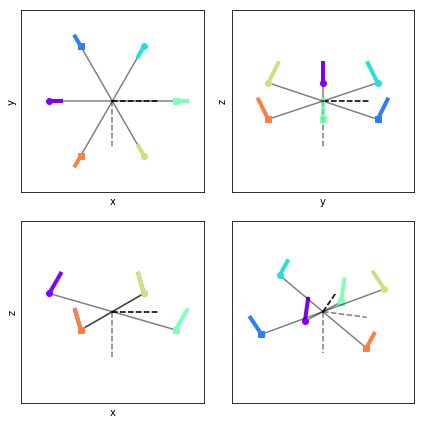

In [11]:
# Geometry
t30    = np.deg2rad(30)
t60    = np.deg2rad(60)
thetas = np.arange(-np.pi, np.pi, t60)
l  = 0.16
h  = 0.5*l * np.sin(t30)

geom = pd.DataFrame({ 'x':[l * np.cos(t30) * np.cos(theta) for theta in thetas ],
                      'y':[l * np.cos(t30) * np.sin(theta) for theta in thetas ],
                      'z':[h * (-1+2*((i+0)%2))            for i,_ in enumerate(thetas) ],
                      'ax':[-np.sin(t30)*np.cos(theta)*(-1+2*((i+1)%2)) for i,theta in enumerate(thetas) ],
                      'ay':[-np.sin(t30)*np.sin(theta)*(-1+2*((i+1)%2)) for i,theta in enumerate(thetas) ],
                      'az':[-np.cos(t30)                           for _     in thetas ],
                      'dir':[-1+2*((i+1)%2)  for i,_   in enumerate(thetas)],
                      'ct':[1.0              for _ in thetas ],
                      'cm':[0.015            for _ in thetas ] 
                    },
                    columns = ['x', 'y', 'z', 'ax', 'ay', 'az', 'dir', 'ct', 'cm'])

# Matrices
A, B = compute_torque_thrust_matrices(geom)

plot(geom)
print_actuation_effort(B)

print('\nMix:')
B.round(2)

---
### Example for holonomic +4 octo with rotors tilted towards center


Actuation effort for unit commands
Torque: norm  [  2.8    2.8   27.22] / std  [ 0.04  0.04  0.  ]
Thrust: norm  [ 1.    1.    0.41] / std  [ 0.  0.  0.]

Mix:


,Roll,Pitch,Yaw,X,Y,Z
0,-1.03,0.95,-9.62,-0.35,-0.35,-0.14
1,-1.03,0.95,9.62,0.35,0.35,-0.14
2,-0.95,-1.03,-9.62,0.35,-0.35,-0.14
3,-0.95,-1.03,9.62,-0.35,0.35,-0.14
4,1.03,-0.95,-9.62,0.35,0.35,-0.14
5,1.03,-0.95,9.62,-0.35,-0.35,-0.14
6,0.95,1.03,-9.62,-0.35,0.35,-0.14
7,0.95,1.03,9.62,0.35,-0.35,-0.14


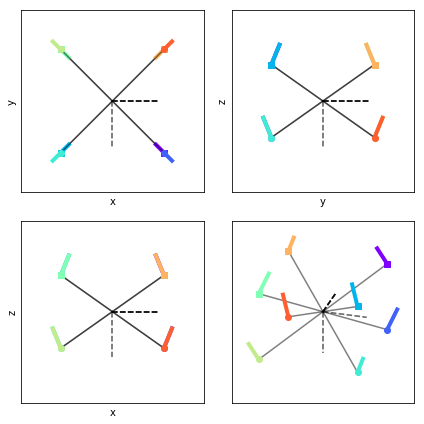

In [12]:
# Geometry
t30    = np.deg2rad(30)
t45    = np.deg2rad(45)
t90    = np.deg2rad(90)
t135   = np.deg2rad(135)
l  = 0.16
# h  = 0.0
h  = 1.0 * l * np.sin(t30)

thetas = np.array([t45, t45, t135, t135, -t135, -t135, -t45, -t45])
# thetas = np.array([0.0, 0.0, t90, t90, 2*t90, 2*t90, -t90, -t90])
# thetas = np.array([-t45/4, t45/4, t90-t45/4, t90+t45/4, 2*t90-t45/4, 2*t90+t45/4, -t90-t45/4, -t90+t45/4])
# thetas = np.array([-t45/2, t45/2, t90-t45/2, t90+t45/2, 2*t90-t45/2, 2*t90+t45/2, -t90-t45/2, -t90+t45/2])


geom = pd.DataFrame({ 'x':[l * np.cos(theta) for theta in thetas ],
                      'y':[l * np.sin(theta) for theta in thetas ],
                      'z':[h * (-1+2*(i%2))  for i,_ in enumerate(thetas) ],
                      'ax':[np.sin(t30)*np.cos(theta)*(-1+2*((1*i+0)%2)) for i,theta in enumerate(thetas) ],
                      'ay':[np.sin(t30)*np.sin(theta)*(-1+2*((1*i+0)%2)) for i,theta in enumerate(thetas) ],
                      'az':[-np.cos(t30)                           for _     in thetas ],
                      'dir':[-1+2*(((2*(i+0))//2)%2)      for i,_   in enumerate(thetas)],
                      'ct':[1.0              for _ in thetas ],
                      'cm':[0.015            for _ in thetas ]
                    },
                    columns = ['x', 'y', 'z', 'ax', 'ay', 'az', 'dir', 'ct', 'cm'])


# Matrices
A, B = compute_torque_thrust_matrices(geom)

plot(geom)
print_actuation_effort(B)

print('\nMix:')
B.round(2)

---
### Example for holonomic x4 octo with rotors tilted sideways


Actuation effort for unit commands
Torque: norm  [ 3.81  3.81  3.8 ] / std  [ 0.  0.  0.]
Thrust: norm  [ 1.    1.    0.41] / std  [ 0.  0.  0.]

Mix:


,Roll,Pitch,Yaw,X,Y,Z
0,-1.35,1.35,-1.34,0.35,-0.35,-0.14
1,-1.35,1.35,1.34,-0.35,0.35,-0.14
2,-1.35,-1.35,-1.34,0.35,0.35,-0.14
3,-1.35,-1.35,1.34,-0.35,-0.35,-0.14
4,1.35,-1.35,-1.34,-0.35,0.35,-0.14
5,1.35,-1.35,1.34,0.35,-0.35,-0.14
6,1.35,1.35,-1.34,-0.35,-0.35,-0.14
7,1.35,1.35,1.34,0.35,0.35,-0.14


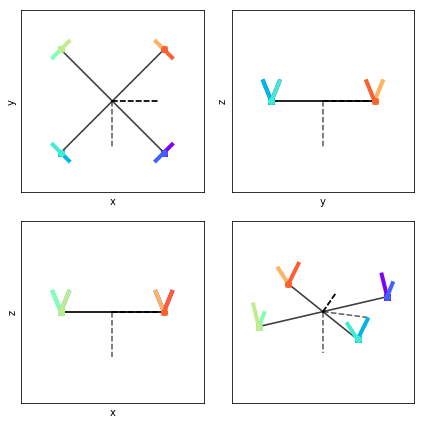

In [13]:
# Thrust and moment coefficients
Ct = 1.0
Cm = Ct / 10.0

# Geometry
t30    = np.deg2rad(30)
t45    = np.deg2rad(45)
t90    = np.deg2rad(90)
t135   = np.deg2rad(135)
l  = 0.16
h  = 0.0#l * np.sin(t30)
# h  = 0.5*l * np.sin(t30)

thetas = np.array([t45, t45, t135, t135, -t135, -t135, -t45, -t45])
# thetas = np.array([-t45/2, t45/2, t90-t45/2, t90+t45/2, 2*t90-t45/2, 2*t90+t45/2, -t90-t45/2, -t90+t45/2])

geom = pd.DataFrame({ 'x':[l * np.cos(theta)    for theta in thetas ],
                      'y':[l * np.sin(theta)    for theta in thetas ],
                      'z':[h * (-1+2*((i+0)%2)) for i,_ in enumerate(thetas) ],
                      'ax':[np.sin(t30)*np.cos(theta + t90*(-1+2*(((2*i+1)//2)%2))) for i,theta in enumerate(thetas) ],
                      'ay':[np.sin(t30)*np.sin(theta + t90*(-1+2*(((2*i+1)//2)%2))) for i,theta in enumerate(thetas) ],
                      'az':[-np.cos(t30)                                for _     in thetas ],
                      'dir':[(-1+2*(((2*i)//2)%2))      for i,_   in enumerate(thetas)],
                      'ct':[1.0              for _ in thetas ],
                      'cm':[0.015            for _ in thetas ]
                    },
                    columns = ['x', 'y', 'z', 'ax', 'ay', 'az', 'dir', 'ct', 'cm'])


# Matrices
A, B = compute_torque_thrust_matrices(geom)

plot(geom)
print_actuation_effort(B)

print('\nMix:')
B.round(2)